<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Draw-hit-event-vertical-line" data-toc-modified-id="Draw-hit-event-vertical-line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Draw hit event vertical line</a></span></li><li><span><a href="#RMS" data-toc-modified-id="RMS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RMS</a></span><ul class="toc-item"><li><span><a href="#Consider--left--arm" data-toc-modified-id="Consider--left--arm-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Consider <font color="red"> left </font> arm</a></span></li><li><span><a href="#consider--right--arm" data-toc-modified-id="consider--right--arm-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>consider <font color="red"> right </font> arm</a></span></li><li><span><a href="#Put-two-arms-together" data-toc-modified-id="Put-two-arms-together-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Put two arms together</a></span></li><li><span><a href="#locally" data-toc-modified-id="locally-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>locally</a></span></li></ul></li><li><span><a href="#Angular-acceleration" data-toc-modified-id="Angular-acceleration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Angular acceleration</a></span><ul class="toc-item"><li><span><a href="#left" data-toc-modified-id="left-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>left</a></span></li><li><span><a href="#right" data-toc-modified-id="right-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>right</a></span></li><li><span><a href="#left-&amp;-right-together" data-toc-modified-id="left-&amp;-right-together-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>left &amp; right together</a></span></li><li><span><a href="#locally" data-toc-modified-id="locally-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>locally</a></span></li></ul></li></ul></div>

At first, concentrate on the who_id=7, song_id=1, performance_order=3 case.
```
bb_capture.capture_2018_03_28_15_03_47
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import time
import sys
import math

from scipy.stats import mode
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime, timedelta
from collections import deque
from tqdm import tqdm

LEFT_PATH = '../data/bb_left_forearm_csv/'
RIGHT_PATH = '../data/bb_right_forearm_csv/'
TABLE_PATH = '../data/taiku_tables/'
PATH = '../data/bb_capture/'
OUTPUT_PATH = '../output/'
PROCESSED_PATH = '../data/'

ZERO_ADJ_COL = ['imu_ax', 'imu_ay', 'imu_az', 'imu_gx', 'imu_gy', 'imu_gz', 'msu_ax', 'msu_ay', 'msu_az']

colors picked the same as taoyi's.

In [2]:
COLORS = ['black', 'red', 'blue', 'yellow', 'green', 'cyan', 'purple']

In [3]:
def adjust_zero(df, modes_dict=None):
    copy_df = df.copy()
    for col in ZERO_ADJ_COL:
        mode_ = mode(copy_df[col])[0] if modes_dict is None else modes_dict[col]
        copy_df[col] = copy_df[col] - mode_
    return copy_df

In [4]:
def get_modes_dict(df):
    modes = {}
    copy_df = df.copy()
    for col in ZERO_ADJ_COL:
        mode_ = mode(copy_df[col])[0]
        modes[col] = mode_
    return modes

# Draw hit event vertical line

In [5]:
files = next(os.walk(LEFT_PATH))[2]
left_df = [
    pd.read_csv(LEFT_PATH + filename, dtype={
        'timestamp': np.float64
    }) for filename in files
]
left_df = pd.concat(left_df, ignore_index=True)
left_df.drop('key', axis=1, inplace=True)
files

['data_2018_03_27_13_25_43.csv',
 'data_2018_03_28_15_52_48.csv',
 'data_2018_03_27_14_48_28.csv',
 'data_2018_03_28_16_59_47.csv',
 'data_2018_03_27_11_37_57.csv',
 'data_2018_03_28_14_52_45.csv',
 'data_2018_03_27_16_12_02.csv',
 'data_2018_03_31_15_29_36.csv']

In [6]:
files = next(os.walk(RIGHT_PATH))[2]
right_df = [
    pd.read_csv(RIGHT_PATH + filename, dtype={
        'timestamp': np.float64
    }) for filename in files
]
right_df = pd.concat(right_df, ignore_index=True)
right_df.drop('key', axis=1, inplace=True)
files

['data_2018_03_27_11_40_03.csv',
 'data_2018_03_28_16_59_37.csv',
 'data_2018_03_27_14_50_24.csv',
 'data_2018_03_28_14_52_43.csv',
 'data_2018_03_31_15_29_27.csv',
 'data_2018_03_27_16_14_52.csv',
 'data_2018_03_28_15_52_55.csv',
 'data_2018_03_27_13_20_28.csv']

**Hit_type**

```
1: Dong_small
2:Ka_small
3: Dong_big
4:Ka_big
5:small_Hit_stream
6:big_Hit_steam
```

In [7]:
song_df = pd.read_csv(TABLE_PATH + 'taiko_song_1_info.csv')
song_df.drop(['#', 'separator'], axis=1, inplace=True)
song_df.columns = ['bar', 'bpm', 'time_unit', 'timestamp', 'label', 'continuous', 'value']
song_df.head(10)

,bar,bpm,time_unit,timestamp,label,continuous,value
0,1,123,0.2439,0.0000,1,0,1
1,1,123,0.2439,0.2439,0,0,0
2,1,123,0.2439,0.4878,0,0,0
3,1,123,0.2439,0.7317,0,0,0
4,1,123,0.2439,0.9756,1,0,1
5,1,123,0.2439,1.2195,0,0,0
6,1,123,0.2439,1.4634,0,0,0
7,1,123,0.2439,1.7073,0,0,0
8,2,123,0.2439,1.9512,1,0,1
9,2,123,0.2439,2.1951,0,0,0


In [8]:
time_unit = song_df['time_unit'][0]
bar_unit = time_unit * 8

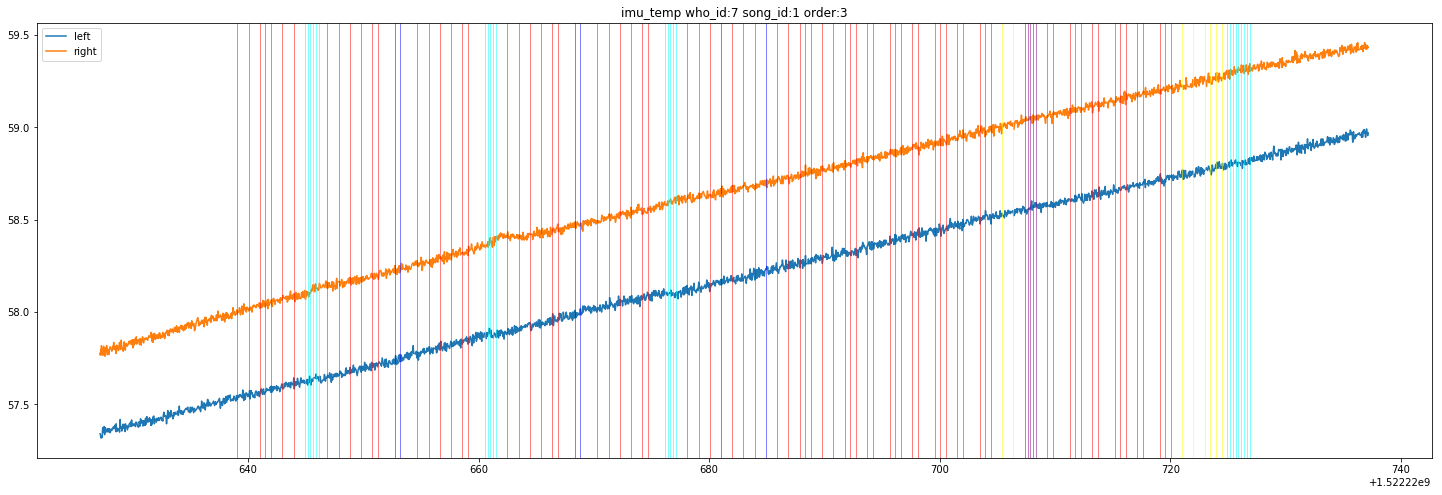

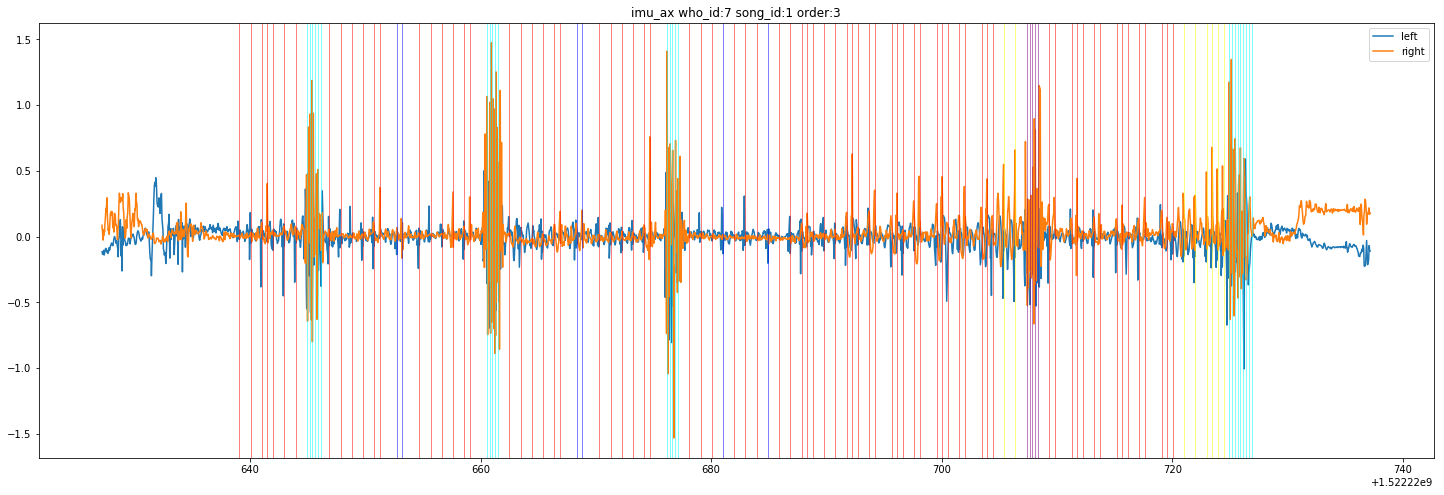

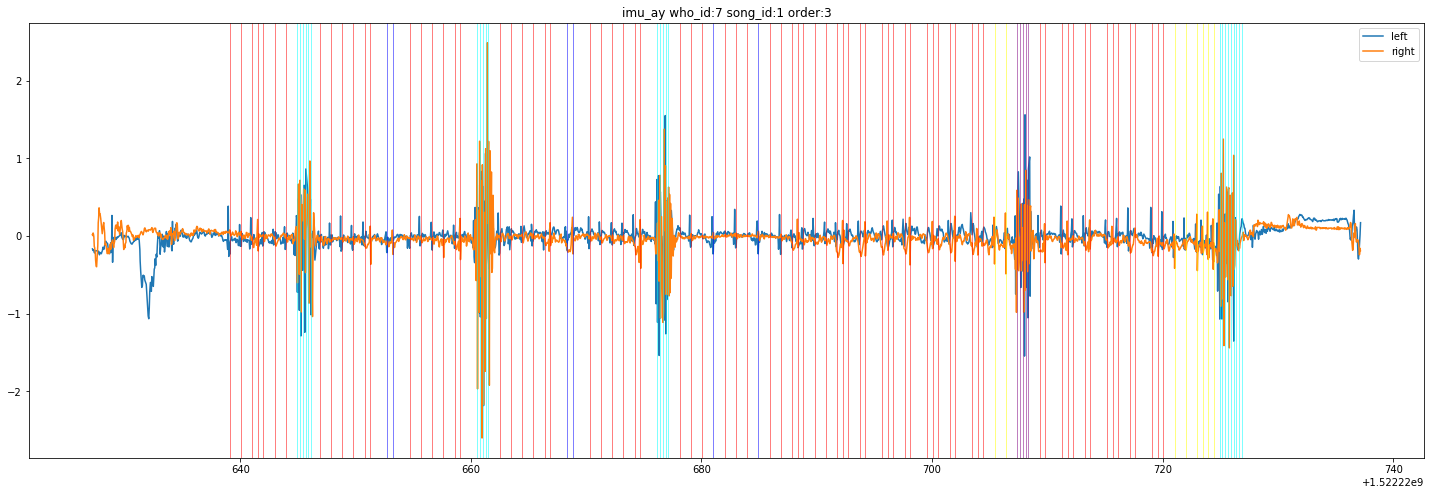

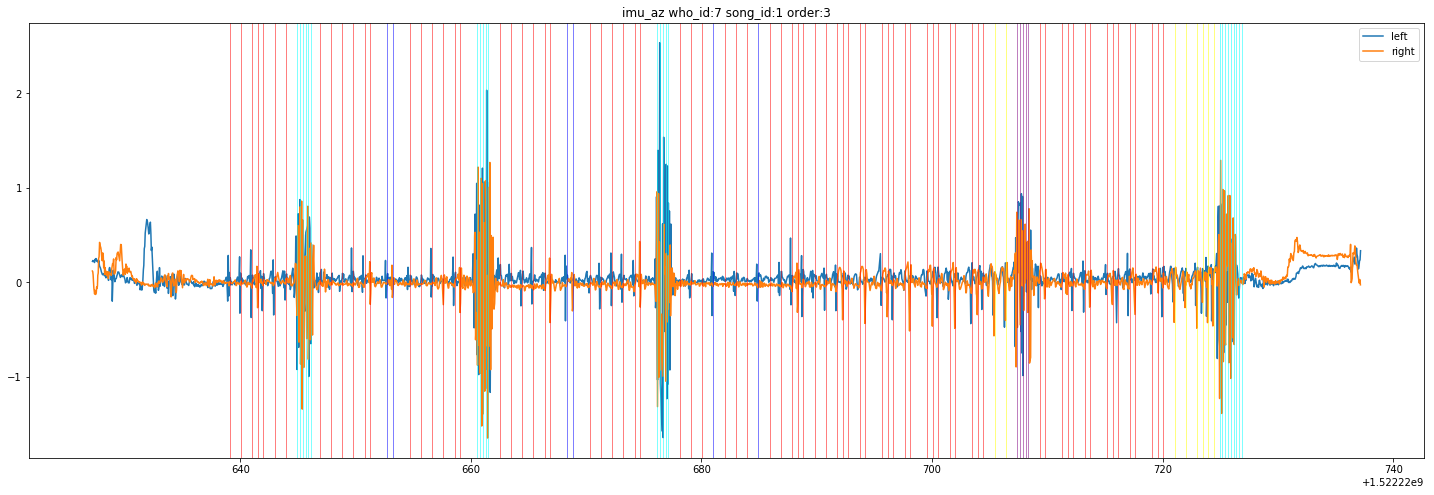

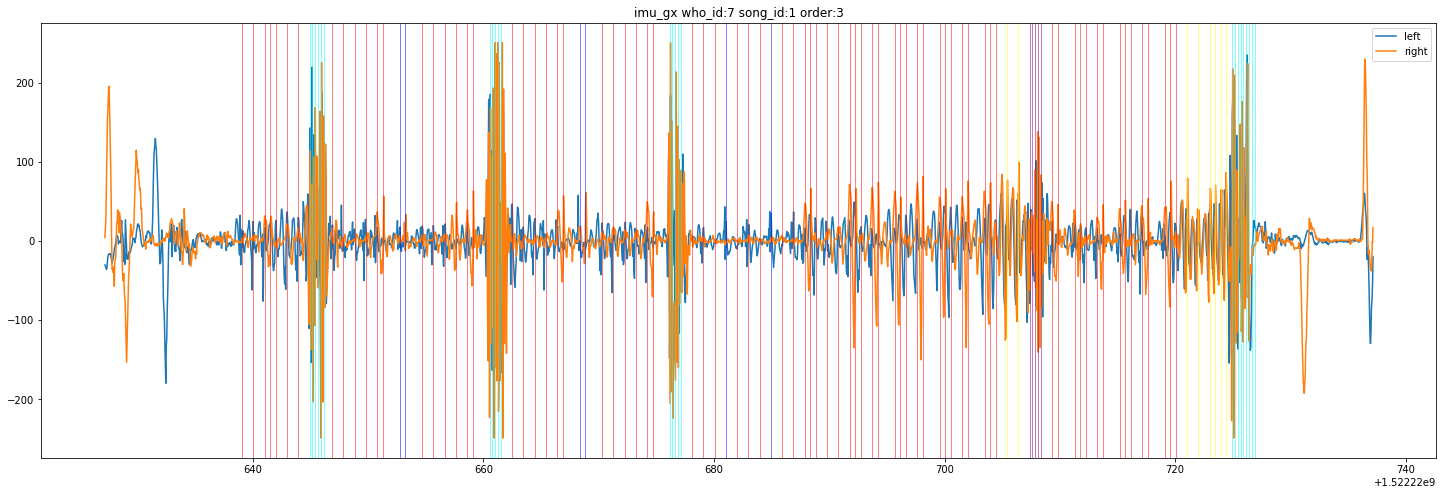

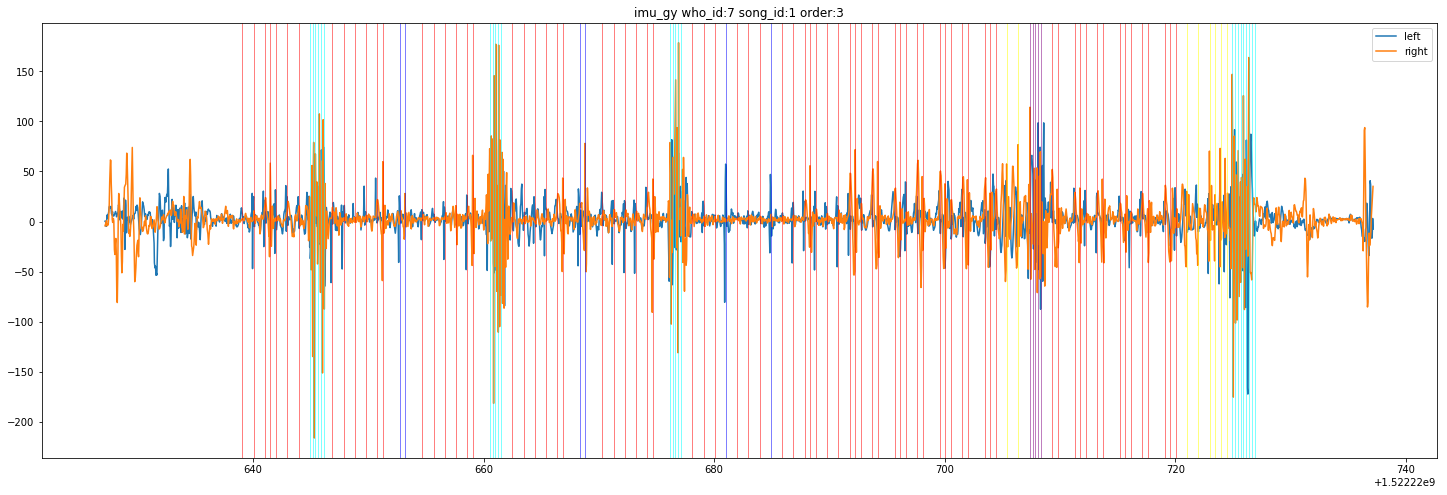

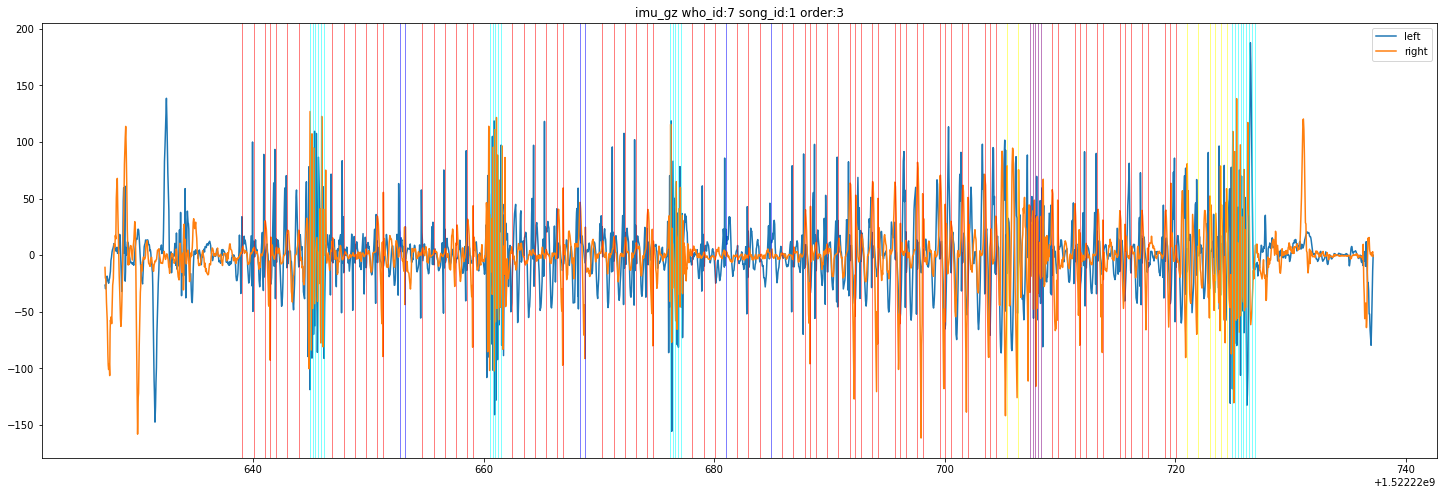

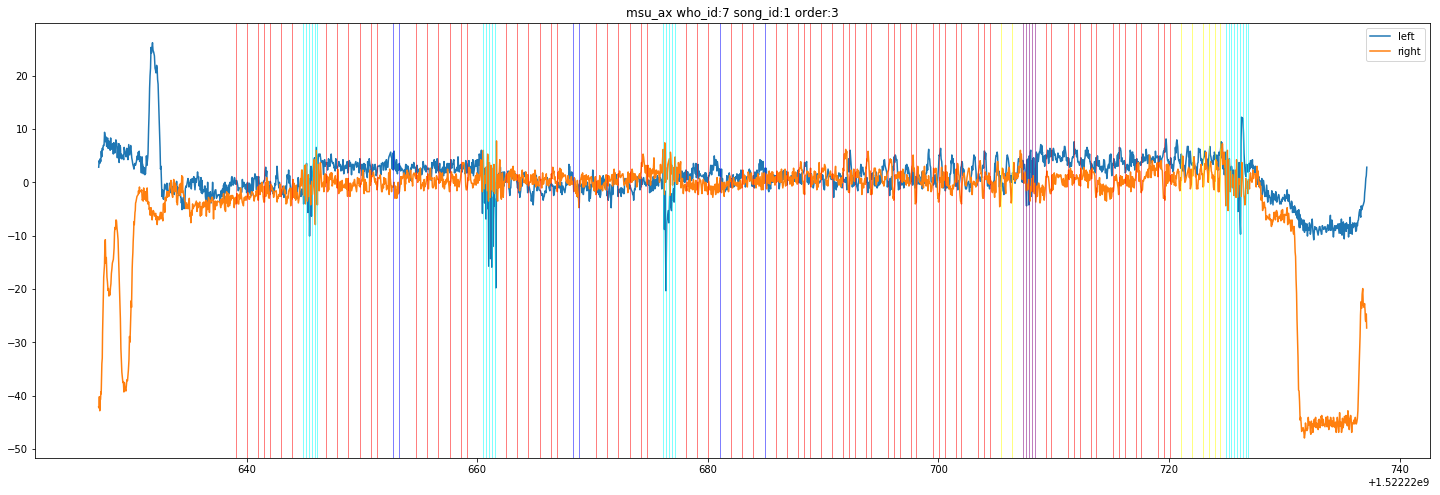

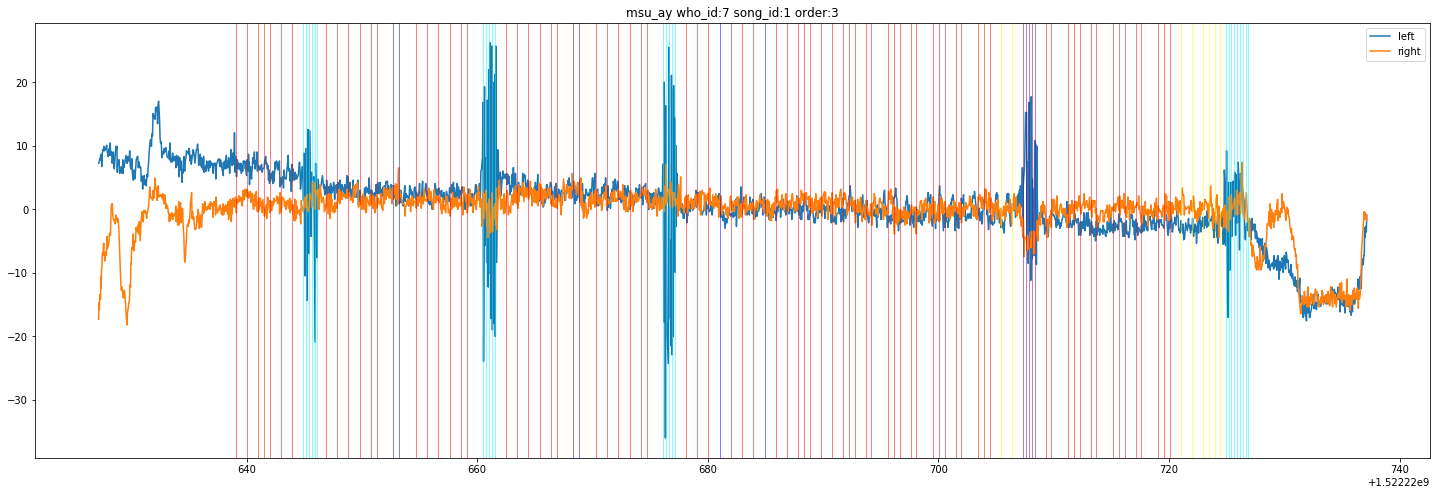

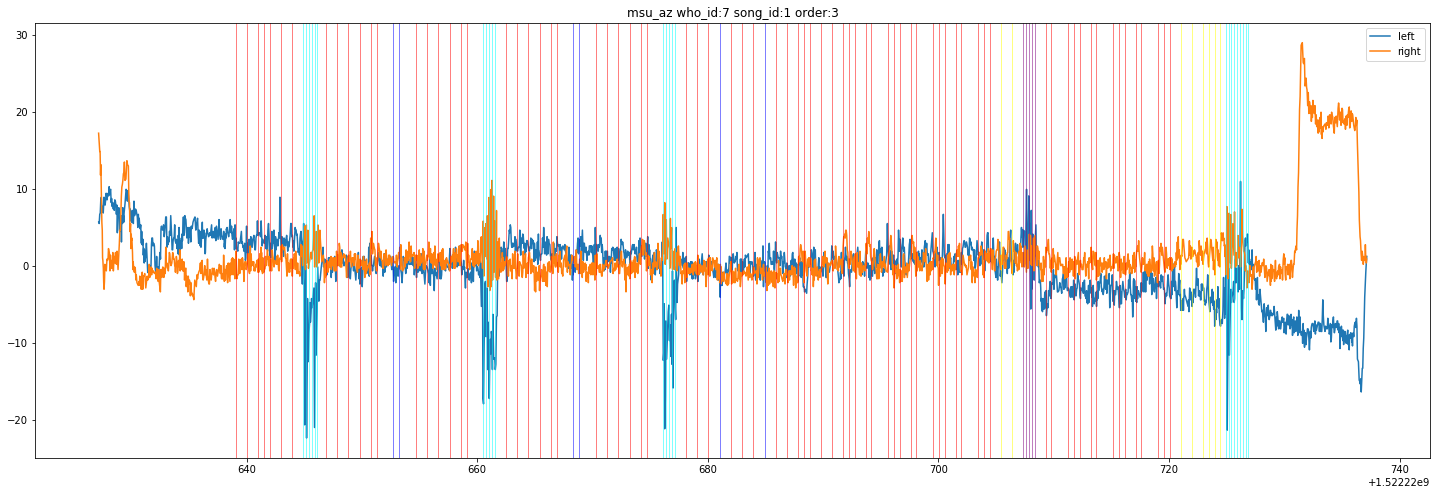

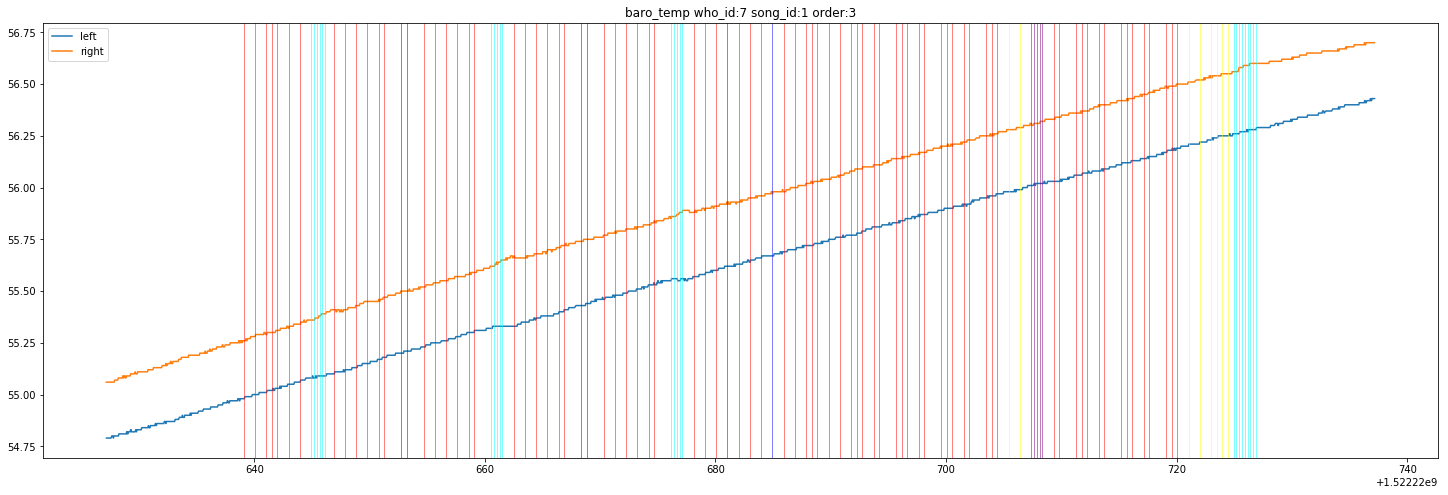

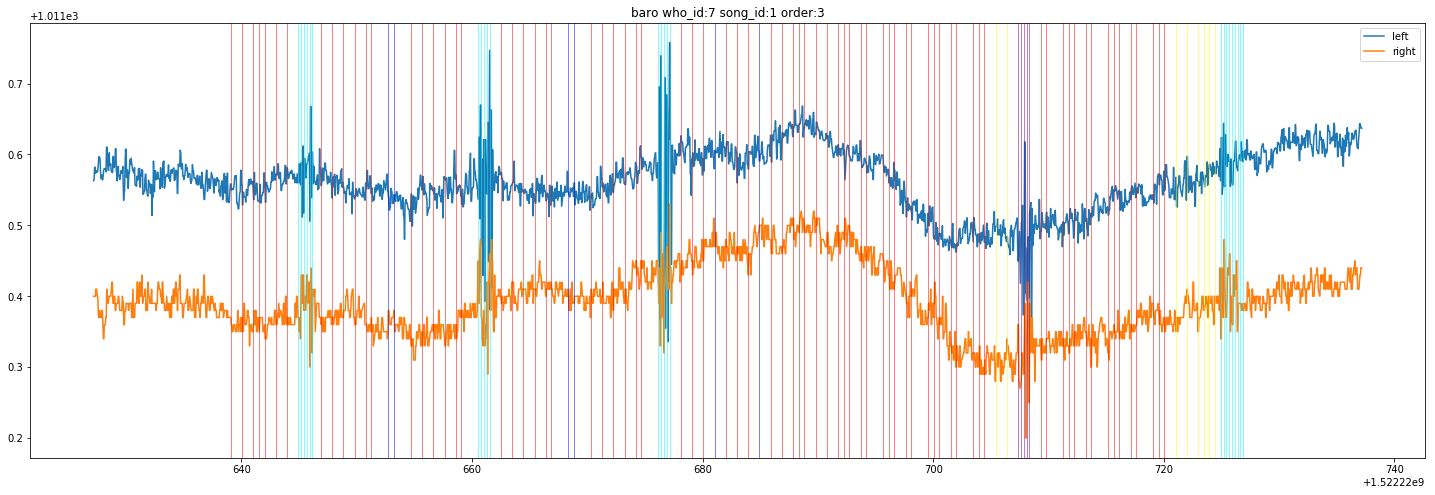

In [9]:
# the times are picked by artificial observation
first_hit_time = 1522220639.08
start_time = 1522220627.1636708
end_time = start_time + 110

for col in left_df:
    if col != 'timestamp' and col != 'wall_time':
        plt.figure(figsize=(25, 8))

        # retrieve left arm info
        play_df = left_df[(left_df['timestamp'] >= start_time)
                          & (left_df['timestamp'] <= end_time)]
        
        play_df = adjust_zero(play_df)
        plt.plot(play_df['timestamp'], play_df[col], label='left')

        # retrieve right arm info
        play_df = right_df[(right_df['timestamp'] >= start_time)
                           & (right_df['timestamp'] <= end_time)]
        
        play_df = adjust_zero(play_df)        
        plt.plot(play_df['timestamp'], play_df[col], label='right')

        # draw vertical mark line
        for i in range(len(song_df)):
            row = song_df.iloc[i]
            hit_type = int(row['label'])
            if hit_type > 0:
                plt.axvline(
                    first_hit_time + row['timestamp'],
                    color=COLORS[hit_type],
                    lw=0.5)
#             print(row)

        plt.legend()
        save_name = '%s who_id:%d song_id:%d order:%d' % (col, 7, 1, 3)
        plt.title(save_name)
        #       plt.savefig(directory + '/' + save_name + '.png')
        
        plt.show()
        plt.close()

# RMS

## Consider <font color='red'> left </font> arm

In [10]:
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]

left_modes = get_modes_dict(play_df)
    
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (
    play_df['imu_ax'] * play_df['imu_ax'] +
    play_df['imu_ay'] * play_df['imu_ay'] +
    play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
rms_df

,timestamp,imu_ax,imu_ay,imu_az,rms
388062,1.522221e+09,-0.116,-0.165,0.221,0.299202
388063,1.522221e+09,-0.135,-0.185,0.231,0.325286
388064,1.522221e+09,-0.132,-0.176,0.221,0.311835
388065,1.522221e+09,-0.105,-0.200,0.224,0.318121
388066,1.522221e+09,-0.141,-0.217,0.209,0.332642
388067,1.522221e+09,-0.120,-0.191,0.243,0.331557
388068,1.522221e+09,-0.104,-0.189,0.231,0.316066
388069,1.522221e+09,-0.090,-0.190,0.251,0.327416
388070,1.522221e+09,-0.092,-0.189,0.224,0.307182
388071,1.522221e+09,-0.118,-0.190,0.221,0.314428


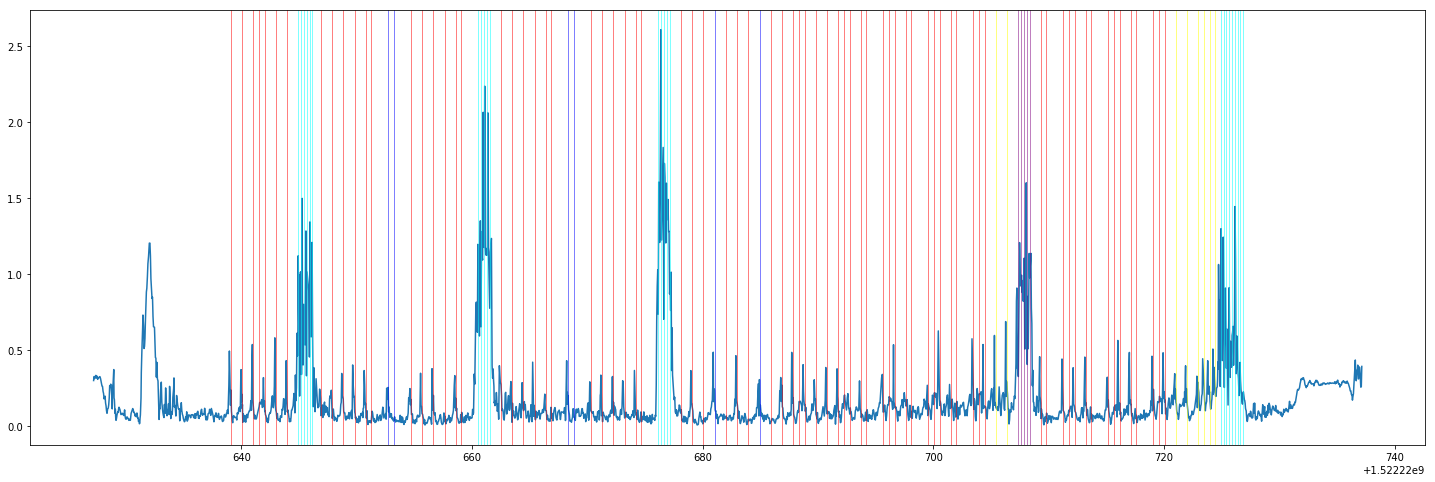

In [11]:
plt.figure(figsize=(25, 8))
plt.plot(rms_df['timestamp'], rms_df['rms'], label='left')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        plt.axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
plt.show()

## consider <font color='red'> right </font> arm

In [12]:
play_df = right_df[(right_df['timestamp'] >= start_time)
                   & (right_df['timestamp'] <= end_time)]
right_modes = get_modes_dict(play_df)
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (
    play_df['imu_ax'] * play_df['imu_ax'] +
    play_df['imu_ay'] * play_df['imu_ay'] +
    play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
rms_df

,timestamp,imu_ax,imu_ay,imu_az,rms
314655,1.522221e+09,0.086,0.018,0.119,0.147922
314656,1.522221e+09,0.046,0.006,0.112,0.121227
314657,1.522221e+09,0.016,0.040,0.078,0.089107
314658,1.522221e+09,-0.027,0.022,0.000,0.034828
314659,1.522221e+09,0.014,-0.009,-0.060,0.062266
314660,1.522221e+09,0.009,-0.136,-0.102,0.170238
314661,1.522221e+09,0.055,-0.144,-0.124,0.197831
314662,1.522221e+09,0.037,-0.183,-0.084,0.204729
314663,1.522221e+09,0.094,-0.221,-0.108,0.263327
314664,1.522221e+09,0.122,-0.311,-0.129,0.358115


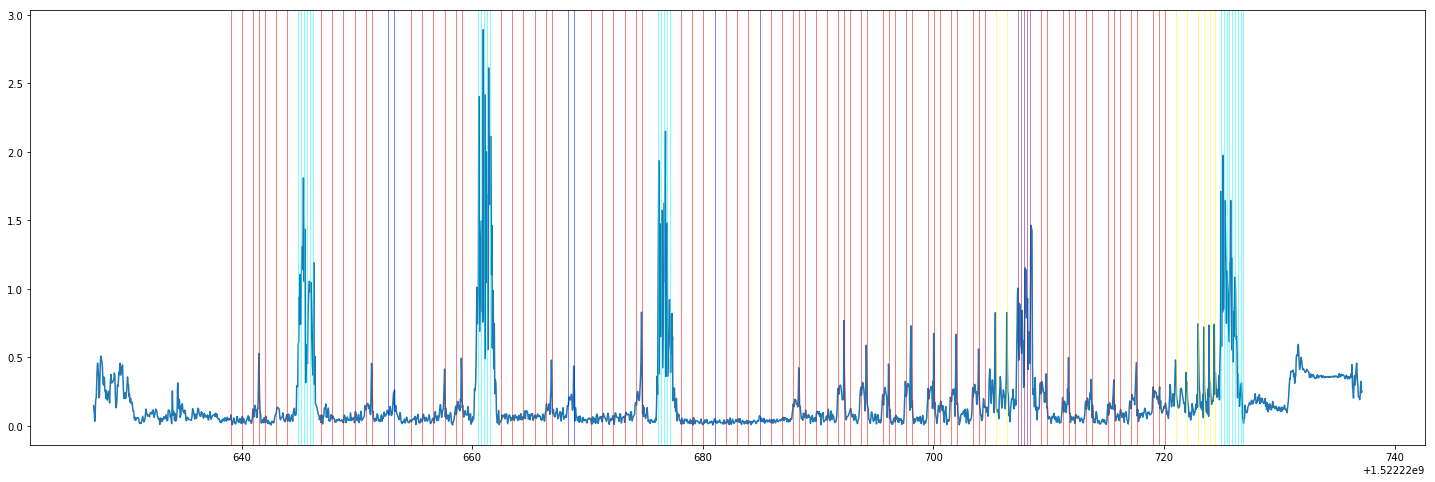

In [13]:
plt.figure(figsize=(25, 8))
plt.plot(rms_df['timestamp'], rms_df['rms'], label='right')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        plt.axvline(first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
plt.show()

## Put two arms together

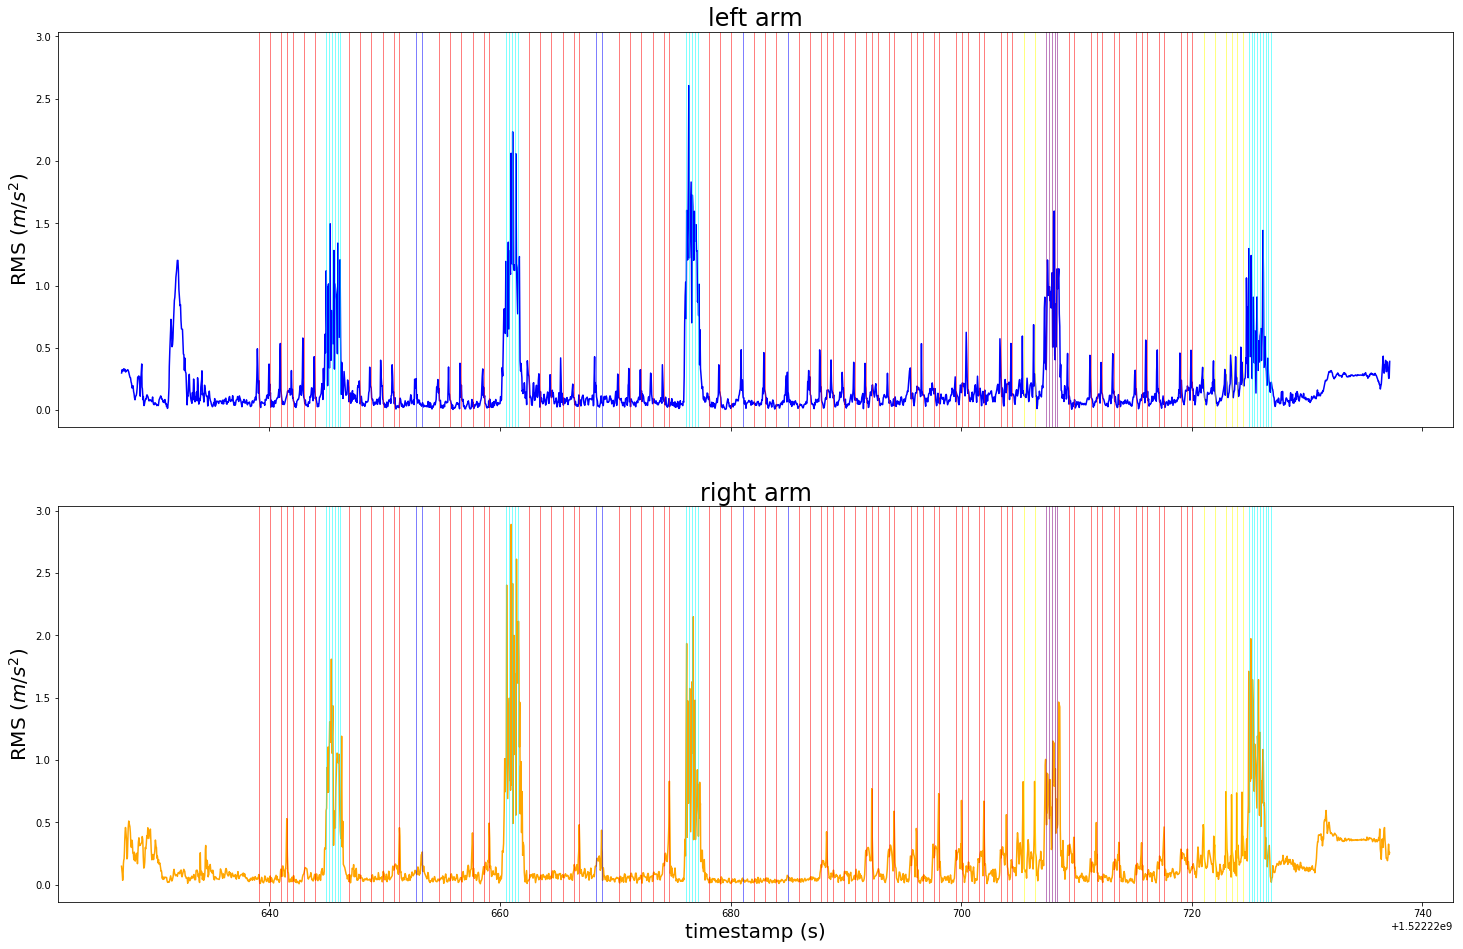

In [14]:
fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(25, 16))

# left arm
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (
    play_df['imu_ax'] * play_df['imu_ax'] +
    play_df['imu_ay'] * play_df['imu_ay'] +
    play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
ax[0].plot(rms_df['timestamp'], rms_df['rms'], color='blue', label='left')

# right arm
play_df = right_df[(right_df['timestamp'] >= start_time)
                   & (right_df['timestamp'] <= end_time)]
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (
    play_df['imu_ax'] * play_df['imu_ax'] +
    play_df['imu_ay'] * play_df['imu_ay'] +
    play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
ax[1].plot(rms_df['timestamp'], rms_df['rms'], color='orange', label='right')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        ax[0].axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
        ax[1].axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)

ax[0].set_title('left arm', fontsize=24)
ax[1].set_title('right arm', fontsize=24)
ax[1].set_xlabel('timestamp (s)', fontsize=20)
ax[0].set_ylabel('RMS ($m/s^2$)', fontsize=20)
ax[1].set_ylabel('RMS ($m/s^2$)', fontsize=20)

plt.show()

## locally

In [15]:
time_samples = []
tm = start_time
while tm <= end_time:
    time_samples.append(tm)
    tm += time_unit

In [16]:
events = []

# spot vertical mark lines
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        events.append((first_hit_time + row['timestamp'], hit_type))

In [17]:
# access particular folder, if doesn't exist, create it
directory = OUTPUT_PATH + 'bb_capture.capture_2018_03_28_15_03_47'
if not os.path.exists(directory):
    os.makedirs(directory)

In [18]:
event_i = 0
window_deque = deque()

for id_, tm in enumerate(time_samples):
    local_start_time = tm
    local_end_time = tm + 4 * bar_unit

    while event_i < len(events) and events[event_i][0] <= local_end_time:
        if events[event_i][0] >= local_start_time:
            window_deque.append(events[event_i])
        event_i += 1
    while window_deque and window_deque[0][0] < local_start_time:
        window_deque.popleft()
        
    fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(15, 8))

    # left arm
    play_df = left_df[(left_df['timestamp'] >= local_start_time)
                      & (left_df['timestamp'] <= local_end_time)]
    play_df = adjust_zero(play_df, left_modes)    
    rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
    rms_df['rms'] = (
        play_df['imu_ax'] * play_df['imu_ax'] +
        play_df['imu_ay'] * play_df['imu_ay'] +
        play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
    ax[0].plot(rms_df['timestamp'], rms_df['rms'], color='blue', label='left')

    # right arm
    play_df = right_df[(right_df['timestamp'] >= local_start_time)
                       & (right_df['timestamp'] <= local_end_time)]
    play_df = adjust_zero(play_df, right_modes)    
    rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
    rms_df['rms'] = (
        play_df['imu_ax'] * play_df['imu_ax'] +
        play_df['imu_ay'] * play_df['imu_ay'] +
        play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
    ax[1].plot(
        rms_df['timestamp'], rms_df['rms'], color='orange', label='right')

    for elem in window_deque:
        event_timestamp = elem[0]
        hit_type = elem[1]
        ax[0].axvline(event_timestamp, color=COLORS[hit_type], lw=0.5)
        ax[1].axvline(event_timestamp, color=COLORS[hit_type], lw=0.5)
        
    ax[0].set_ylim([0, 3.5])
    ax[1].set_ylim([0, 3.5])
    
    ax[0].set_title('left arm', fontsize=24)
    ax[1].set_title('right arm', fontsize=24)
    ax[1].set_xlabel('timestamp (s)', fontsize=20)
    ax[0].set_ylabel('RMS ($m/s^2$)', fontsize=20)
    ax[1].set_ylabel('RMS ($m/s^2$)', fontsize=20)
    
    save_name = "%04d-%.2f" % (id_, local_start_time)
    plt.savefig(directory + '/' + save_name + '.png')
#     plt.show()
    plt.close()

# Angular acceleration

## left

In [19]:
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]
left_modes = get_modes_dict(play_df)
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
rms_df['rms'] = (
    play_df['imu_gx'] * play_df['imu_gx'] +
    play_df['imu_gy'] * play_df['imu_gy'] +
    play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
rms_df

,timestamp,imu_gx,imu_gy,imu_gz,rms
388062,1.522221e+09,-30.136,0.336,-26.489,40.124288
388063,1.522221e+09,-31.586,0.313,-29.686,43.347802
388064,1.522221e+09,-34.080,-4.822,-26.131,43.214896
388065,1.522221e+09,-35.820,0.847,-22.171,42.134820
388066,1.522221e+09,-33.417,6.561,-18.517,38.763667
388067,1.522221e+09,-23.804,2.998,-21.889,32.476865
388068,1.522221e+09,-19.447,7.156,-22.896,30.880754
388069,1.522221e+09,-16.479,9.270,-24.780,31.169516
388070,1.522221e+09,-16.098,14.450,-21.996,30.850804
388071,1.522221e+09,-16.296,15.297,-20.035,30.015980


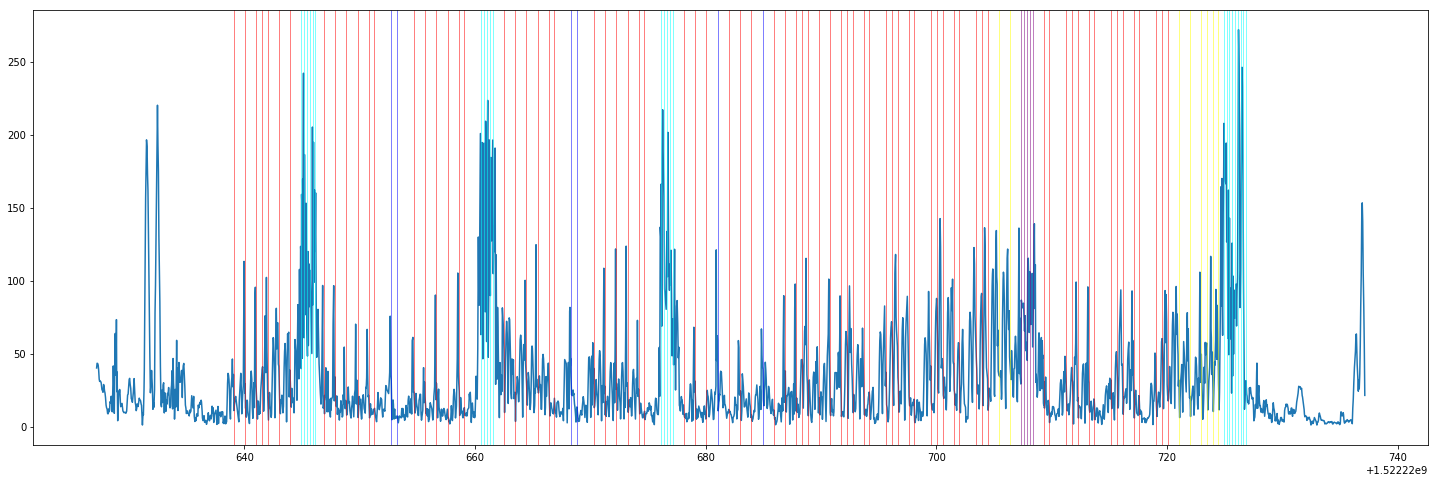

In [20]:
plt.figure(figsize=(25, 8))
plt.plot(rms_df['timestamp'], rms_df['rms'], label='left')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        plt.axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
plt.show()

## right

In [21]:
play_df = right_df[(right_df['timestamp'] >= start_time)
                  & (right_df['timestamp'] <= end_time)]
right_modes = get_modes_dict(play_df)
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
rms_df['rms'] = (
    play_df['imu_gx'] * play_df['imu_gx'] +
    play_df['imu_gy'] * play_df['imu_gy'] +
    play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
rms_df

,timestamp,imu_gx,imu_gy,imu_gz,rms
314655,1.522221e+09,4.670,-4.326,-10.803,12.539058
314656,1.522221e+09,12.215,-3.212,-20.325,23.929663
314657,1.522221e+09,20.356,-1.862,-20.561,28.992904
314658,1.522221e+09,39.360,-0.832,-29.297,49.073578
314659,1.522221e+09,67.856,0.717,-41.657,79.625727
314660,1.522221e+09,103.264,-4.441,-51.361,115.417193
314661,1.522221e+09,128.617,-2.693,-57.572,140.940130
314662,1.522221e+09,153.969,-2.449,-72.342,170.134698
314663,1.522221e+09,162.392,-3.594,-88.402,184.929695
314664,1.522221e+09,176.232,-3.197,-97.298,201.332659


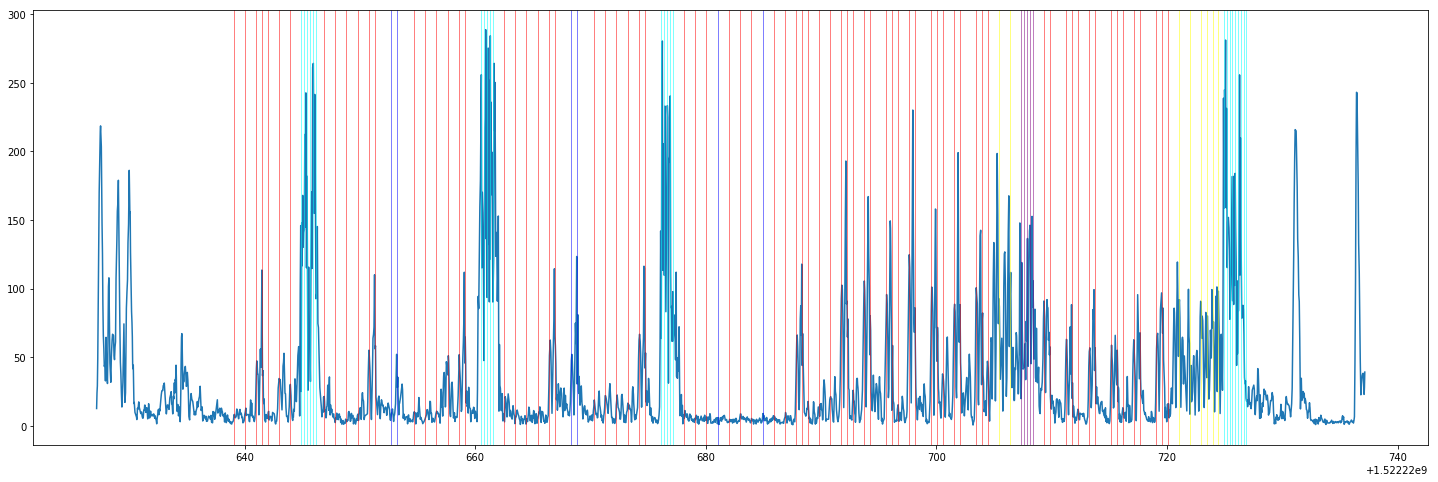

In [22]:
plt.figure(figsize=(25, 8))
plt.plot(rms_df['timestamp'], rms_df['rms'], label='right')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        plt.axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
plt.show()

## left & right together

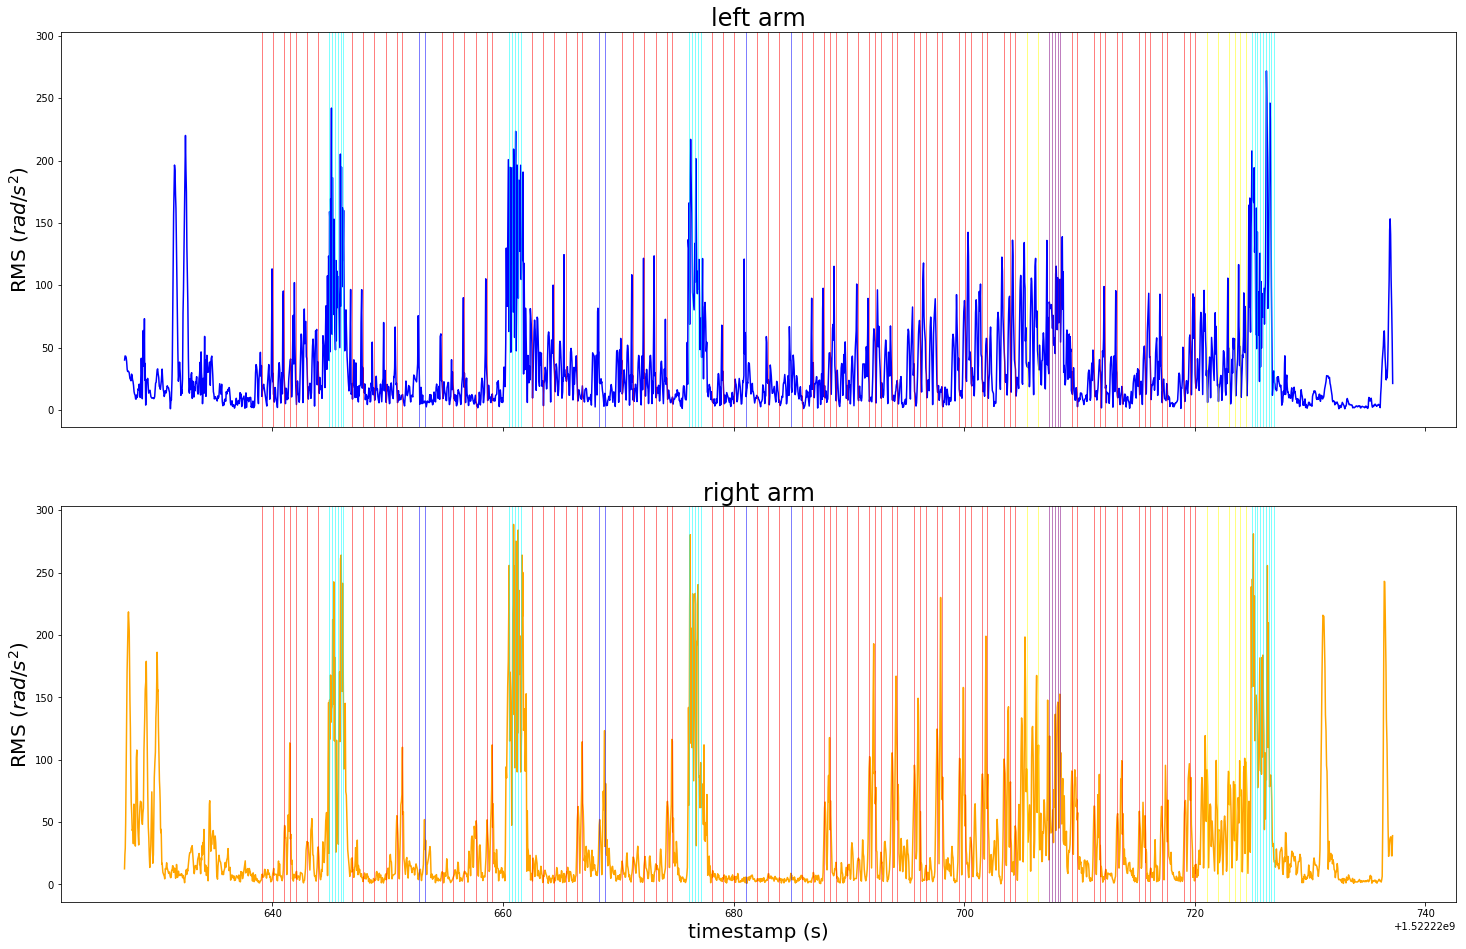

In [23]:
fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(25, 16))

# left arm
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
rms_df['rms'] = (
    play_df['imu_gx'] * play_df['imu_gx'] +
    play_df['imu_gy'] * play_df['imu_gy'] +
    play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
ax[0].plot(rms_df['timestamp'], rms_df['rms'], color='blue', label='left')

# right arm
play_df = right_df[(right_df['timestamp'] >= start_time)
                   & (right_df['timestamp'] <= end_time)]
play_df = adjust_zero(play_df)
rms_df = play_df[['timestamp', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
rms_df['rms'] = (
    play_df['imu_gx'] * play_df['imu_gx'] +
    play_df['imu_gy'] * play_df['imu_gy'] +
    play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
ax[1].plot(rms_df['timestamp'], rms_df['rms'], color='orange', label='right')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        ax[0].axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
        ax[1].axvline(
            first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)

ax[0].set_title('left arm', fontsize=24)
ax[1].set_title('right arm', fontsize=24)
ax[1].set_xlabel('timestamp (s)', fontsize=20)
ax[0].set_ylabel('RMS ($rad/s^2$)', fontsize=20)
ax[1].set_ylabel('RMS ($rad/s^2$)', fontsize=20)

plt.show()

## locally

In [24]:
time_samples = []
tm = start_time
while tm <= end_time:
    time_samples.append(tm)
    tm += time_unit

In [25]:
events = []

# spot vertical mark lines
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        events.append((first_hit_time + row['timestamp'], hit_type))

In [26]:
# access particular folder, if doesn't exist, create it
directory = OUTPUT_PATH + 'augle-bb_capture.capture_2018_03_28_15_03_47'
if not os.path.exists(directory):
    os.makedirs(directory)

In [27]:
event_i = 0
window_deque = deque()

for id_, tm in enumerate(time_samples):
    local_start_time = tm
    local_end_time = tm + 4 * bar_unit

    while event_i < len(events) and events[event_i][0] <= local_end_time:
        if events[event_i][0] >= local_start_time:
            window_deque.append(events[event_i])
        event_i += 1
    while window_deque and window_deque[0][0] < local_start_time:
        window_deque.popleft()
        
    fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(15, 8))

    # left arm
    play_df = left_df[(left_df['timestamp'] >= local_start_time)
                      & (left_df['timestamp'] <= local_end_time)]
    play_df = adjust_zero(play_df, left_modes)    
    rms_df = play_df[['timestamp', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
    rms_df['rms'] = (
        play_df['imu_gx'] * play_df['imu_gx'] +
        play_df['imu_gy'] * play_df['imu_gy'] +
        play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
    ax[0].plot(rms_df['timestamp'], rms_df['rms'], color='blue', label='left')

    # right arm
    play_df = right_df[(right_df['timestamp'] >= local_start_time)
                       & (right_df['timestamp'] <= local_end_time)]
    play_df = adjust_zero(play_df, right_modes)    
    rms_df = play_df[['timestamp', 'imu_gx', 'imu_gy', 'imu_gz']].copy()
    rms_df['rms'] = (
        play_df['imu_gx'] * play_df['imu_gx'] +
        play_df['imu_gy'] * play_df['imu_gy'] +
        play_df['imu_gz'] * play_df['imu_gz']).apply(lambda x: math.sqrt(x))
    ax[1].plot(
        rms_df['timestamp'], rms_df['rms'], color='orange', label='right')

    for elem in window_deque:
        event_timestamp = elem[0]
        hit_type = elem[1]
        ax[0].axvline(event_timestamp, color=COLORS[hit_type], lw=0.5)
        ax[1].axvline(event_timestamp, color=COLORS[hit_type], lw=0.5)
        
    ax[0].set_ylim([0, 300])
    ax[1].set_ylim([0, 300])
    
    ax[0].set_title('left arm', fontsize=24)
    ax[1].set_title('right arm', fontsize=24)
    ax[1].set_xlabel('timestamp (s)', fontsize=20)
    ax[0].set_ylabel('RMS ($rad/s^2$)', fontsize=20)
    ax[1].set_ylabel('RMS ($rad/s^2$)', fontsize=20)
    
    save_name = "%04d-%.2f" % (id_, local_start_time)
    plt.savefig(directory + '/' + save_name + '.png')
#     plt.show()
    plt.close()